In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd
from string import ascii_uppercase as alfabeto

In [2]:
#Guardamos la informacion del dataset en un dataFrame "df"
df = pd.read_csv('songs_normalize.csv', encoding='latin-1')

In [3]:
#para saber que datos tenemos y como estan ordenados
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [4]:
#Dado que los titulos de columnas se encuentran en ingles, cambiamos los nombres para facilitar la interpretacion de los datos.
df=df.rename(columns={
    'artist':'Artista',
    'song':'Cancion',
    'duration_ms':'Duracion',
    'explicit':'Explicito',
    'year':'Año',
    'popularity':'Popularidad',
    'danceability':'Bailabilidad',
    'energy':'Energia',
    'key':'Clave',
    'loudness':'Volumen',
    'mode':'Modo',
    'speechiness':'Palabra_Hablada',
    'acousticness':'Acustica',
    'instrumentalness':'Instrumentalidad',
    'liveness':'Vivacidad',
    'valence':'Valencia',
    'tempo':'Tempo',
    'genre':'Genero'
})

In [5]:
#Chequeamos los cambios
df.head()

,Artista,Cancion,Duracion,Explicito,Año,Popularidad,Bailabilidad,Energia,Clave,Volumen,Modo,Palabra_Hablada,Acustica,Instrumentalidad,Vivacidad,Valencia,Tempo,Genero
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [6]:
#para saber que tipo de datos vamos a tratar
df.dtypes

Artista              object
Cancion              object
Duracion              int64
Explicito              bool
Año                   int64
Popularidad           int64
Bailabilidad        float64
Energia             float64
Clave                 int64
Volumen             float64
Modo                  int64
Palabra_Hablada     float64
Acustica            float64
Instrumentalidad    float64
Vivacidad           float64
Valencia            float64
Tempo               float64
Genero               object
dtype: object

In [20]:
#Canciones mas populares de cada año
df.loc[df.groupby('Año')['Popularidad'].idxmax(),['Año','Artista','Cancion','Popularidad']]

,Año,Artista,Cancion,Popularidad
6,2000,Eminem,The Real Slim Shady,86
107,2001,Jimmy Eat World,The Middle,78
201,2002,Eminem,Without Me,87
300,2003,50 Cent,In Da Club,81
400,2004,Usher,Yeah! (feat. Lil Jon & Ludacris),81
529,2005,Gorillaz,Feel Good Inc.,82
614,2006,Nelly Furtado,Promiscuous,82
708,2007,Timbaland,The Way I Are,80
912,2008,Kanye West,Heartless,82
923,2009,JAY-Z,Empire State Of Mind,82


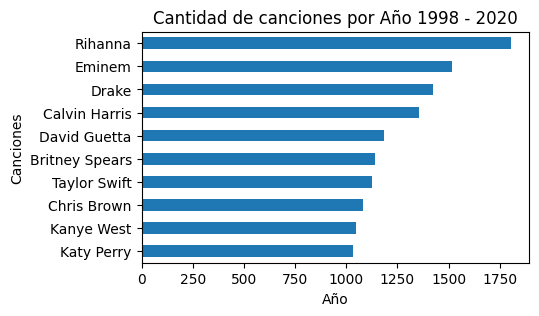

In [30]:
Artista_popularidad = df.groupby('Artista')['Popularidad'].sum().nlargest(10).sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(5, 3))
Artista_popularidad.plot(kind='barh', ax=ax)
ax.set_xlabel('Año')
ax.set_ylabel('Canciones')
ax.set_title('Cantidad de canciones por Año 1998 - 2020')
plt.show()

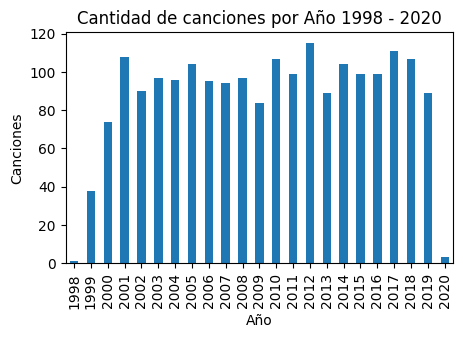

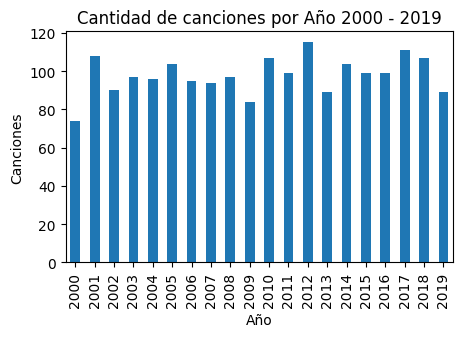

In [7]:
#Ya que nuetro analisis se centrara en la evolucion a traves del tiempo, revisaremos el tamaño de la muestra por cada año
cancion_año = df.groupby('Año')['Cancion'].count()
fig, ax = plt.subplots(figsize=(5, 3))
cancion_año.plot(kind='bar', ax=ax)
ax.set_xlabel('Año')
ax.set_ylabel('Canciones')
ax.set_title('Cantidad de canciones por Año 1998 - 2020')
plt.show()

#Vemos que los años 1998, 1999 y 2020 son muy pocas con respecto a la media de la muestra, 
#por lo que podemos considerar que son datos residuales y omitirlos del analisis

df=df[(df['Año']!=1998) & (df['Año']!=1999) & (df['Año']!=2020)]

cancion_año = df.groupby('Año')['Cancion'].count()
fig, ax = plt.subplots(figsize=(5, 3))
cancion_año.plot(kind='bar', ax=ax)
ax.set_xlabel('Año')
ax.set_ylabel('Canciones')
ax.set_title('Cantidad de canciones por Año 2000 - 2019')
plt.show()

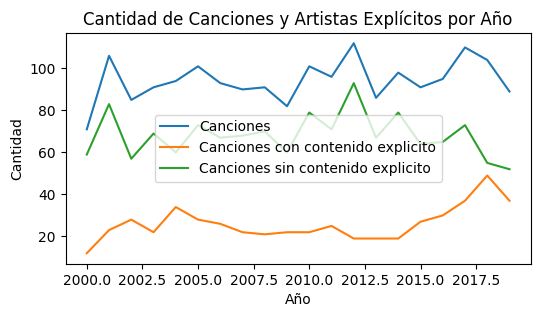

In [11]:
#Realizamos una comparacion de canciones con contenido explicito VS sin contenido explicito

cantidad_canciones_por_año=df.groupby('Año')['Cancion'].nunique()
cantidad_canciones_exp_por_año=df[df['Explicito']==1].groupby('Año')['Cancion'].nunique()
cantidad_canciones_noexp_por_año=df[df['Explicito']==0].groupby('Año')['Cancion'].nunique()

fig, ax = plt.subplots(figsize=(6, 3))
cantidad_canciones_por_año.plot(kind='line', ax=ax, label='Canciones')
cantidad_canciones_exp_por_año.plot(kind='line', ax=ax, label='Canciones con contenido explicito')
cantidad_canciones_noexp_por_año.plot(kind='line', ax=ax, label='Canciones sin contenido explicito')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad de Canciones y Artistas Explícitos por Año')
ax.legend()
plt.show()

#Lo que podemos observar es que a partir del año 2015 se da como fenomeno el aumento de canciones con contenido explicito sostenidamente hasta el año 2018
#esto acompañado de una baja de las canciones sin contenido explicito en el mismo periodo.
#Cabe recordar que esta muestra contempla no todas las canciones, sino aquellas dentro del top de canciones escuchadas, con lo cual la tendencia no 
#refleja en principio una tendencia global en la composicion de canciones sino un cambio en la preferencia de los usuarios respecto a años anteriores.